In [1]:
import pandas as pd

In [2]:
ls -R downloaded-data/

2013-14/ 2014-15/ 2015-16/ 2016-17/

downloaded-data//2013-14:
expendrpt13-14.xls

downloaded-data//2014-15:
expendrpt14-15.xls

downloaded-data//2015-16:
expend-report.xls

downloaded-data//2016-17:
expend-report.xls


sheet: Expenditures_byLEA_byPRC

PRC	PRC Description
001	Classroom Teachers
002	Central Office Administration
003	Non-Instructional Support Personnel
005	School Building Administration
007	Instructional Support Personnel (Certified)
009	Non-Contributory Employee Benefits
010	Waivers for Allotments Converted to Dollars
011	NBTS Educational Leave
012	Driver Training
013	Career Technical Education - Months of Employment
014	Career Technical Education - Program Support Funds
015	School Technology Fund
016	Summer Reading Camps
018	State Employee Severance Payments
019	Small School Supplemental Funding
020	Program Enhancement - Foreign Exchange Teachers
021	Military Differential Pay
022	Advanced Teaching Roles
024	Disadvantaged Students Supplemental Funding
025	State Indian Gaming Funds
027	Teacher Assistants
029	Behavioral Support
030	Digital Learning
031	Low-Wealth Counties Supplemental Funding
032	Children With Special Needs
033	Merit Bonus
034	Academically/Intellectually Gifted
037	Restart Schools
039	School Resource Officers
040	After-School Quality Improvement Grant Program
041	Panic Alarms
042	Child and Family Support Teams - School Nurses
043	Child and Family Support Teams - Social Workers and Other
045	Compensation Bonus (Legislated)
046	Test Result Bonus
054	Limited English Proficiency (LEP)
055	Cooperative Innovative High Schools (CIHS)
056	Transportation of Pupils
061	Classroom Materials/Instructional Supplies & Equipment
063	Special Needs - Developmental Day and Community Residential
066	Assistant Principal Intern - Principal Fellows
067	Assistant Principal Intern - Full Time MSA Student
068	Alternative Programs and Schools
069	At-Risk Student Services
073	School Connectivity
085	mClass Reading 3D
095	Special Dollar Allotment
096	Special Position Allotment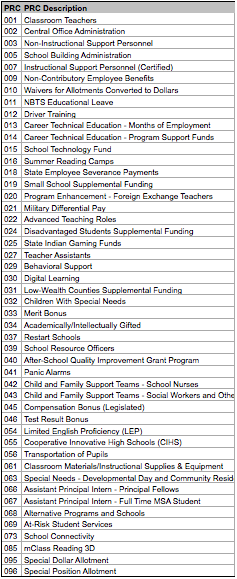

In [3]:
data = pd.read_excel('downloaded-data/2016-17/expend-report.xls', sheet_name='Data Tables', skiprows=2)

data = data[['Key (PRC-LEA)', 'YTDExpenditures', 'YTDAllotment']]

data.columns = ['key', 'expend', 'allotment']

data['prc'] = data.key.str.split('-', expand=True)[0]
data['lea'] = data.key.str.split('-', expand=True)[1]

del data['key']

data = data[['prc', 'lea', 'expend', 'allotment']]
data = data.dropna()

data['fiscal_year'] = '2016-17'

data.to_csv('tidy-data/2016-17.csv')

In [4]:
data = pd.read_excel('downloaded-data/2015-16/expend-report.xls', sheet_name='Data Tables', skiprows=2)

data = data[['Key (PRC-LEA)', 'YTDExpenditures']]

data.columns = ['key', 'expend']
data = data.dropna()

data['prc'] = data.key.str.split('-', expand=True)[0]
data['lea'] = data.key.str.split('-', expand=True)[1]

del data['key']

data = data[['prc', 'lea', 'expend']]

data['fiscal_year'] = '2015-16'

data.to_csv('tidy-data/2015-16.csv')

In [5]:
data = pd.read_excel('downloaded-data/2014-15/expendrpt14-15.xls', sheet_name='Data Tables', skiprows=2)

data = data[['Key (PRC-LEA)', 'YTDExpenditures']]

data.columns = ['key', 'expend']

data['prc'] = data.key.str.split('-', expand=True)[0]
data['lea'] = data.key.str.split('-', expand=True)[1]

del data['key']

data = data[['prc', 'lea', 'expend']]
data = data.dropna()

data['fiscal_year'] = '2014-15'

data.to_csv('tidy-data/2014-15.csv')

In [6]:
data = pd.read_excel('downloaded-data/2013-14/expendrpt13-14.xls', sheet_name='Data Tables', skiprows=2)

data = data[['Key (PRC-LEA)', 'YTDExpenditures']]

data.columns = ['key', 'expend']

data['prc'] = data.key.str.split('-', expand=True)[0]
data['lea'] = data.key.str.split('-', expand=True)[1]

del data['key']

data = data[['prc', 'lea', 'expend']]
data = data.dropna()

data['fiscal_year'] = '2013-14'

data.to_csv('tidy-data/2013-14.csv')

In [7]:
from pathlib import Path
dfs = [pd.read_csv(x, dtype={'prc': str}) for x in Path('tidy-data/').glob('*.csv')]

In [8]:
df = pd.concat(dfs)

/Users/jeremy/code/com-action-day-2018/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13658 entries, 0 to 3538
Data columns (total 6 columns):
Unnamed: 0     13658 non-null int64
allotment      3539 non-null float64
expend         13658 non-null float64
fiscal_year    13658 non-null object
lea            13658 non-null object
prc            13658 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 746.9+ KB


In [10]:
df.head()

,Unnamed: 0,allotment,expend,fiscal_year,lea,prc
0,0,NaN,52028565.47,2013-14,010,001
1,1,NaN,13168252.79,2013-14,020,001
2,2,NaN,3709357.15,2013-14,030,001
3,3,NaN,8763052.22,2013-14,040,001
4,4,NaN,8226000.22,2013-14,050,001


In [11]:
!head tidy-data/2013-14.csv

,prc,lea,expend,fiscal_year
0,001,010,52028565.47,2013-14
1,001,020,13168252.79,2013-14
2,001,030,3709357.15,2013-14
3,001,040,8763052.22,2013-14
4,001,050,8226000.22,2013-14
5,001,060,5576871.13,2013-14
6,001,070,17182656.4,2013-14
7,001,080,6413737.85,2013-14
8,001,090,11806658.02,2013-14


In [12]:
dur = df.query('lea == "320"')
dur;

In [13]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

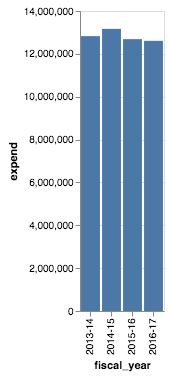

In [14]:
alt.Chart(dur.query('prc=="056"')).mark_bar().encode(x='fiscal_year', y='expend')

In [15]:
16_800_000_000
df.groupby('fiscal_year').sum()


,Unnamed: 0,allotment,expend
fiscal_year,,,
2013-14,6119751,0.000000e+00,1.536945e+10
2014-15,5812345,0.000000e+00,1.606367e+10
2015-16,5150445,0.000000e+00,1.625396e+10
2016-17,6260491,1.695648e+10,1.685461e+10


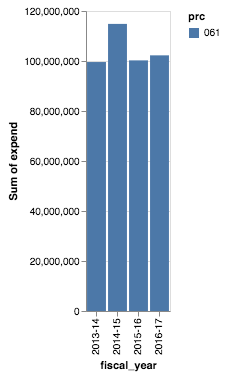

In [16]:
dat = df.query('prc.str.startswith("061")')
alt.Chart(dat).mark_bar().encode(x='fiscal_year', y='sum(expend)', color='prc')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13658 entries, 0 to 3538
Data columns (total 6 columns):
Unnamed: 0     13658 non-null int64
allotment      3539 non-null float64
expend         13658 non-null float64
fiscal_year    13658 non-null object
lea            13658 non-null object
prc            13658 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 746.9+ KB


In [18]:
df.head()

,Unnamed: 0,allotment,expend,fiscal_year,lea,prc
0,0,NaN,52028565.47,2013-14,010,001
1,1,NaN,13168252.79,2013-14,020,001
2,2,NaN,3709357.15,2013-14,030,001
3,3,NaN,8763052.22,2013-14,040,001
4,4,NaN,8226000.22,2013-14,050,001


In [19]:
alt.renderers.enable('json')

RendererRegistry.enable('json')

In [20]:
dat = df #df.query('prc.str.startswith("061")')
alt.Chart(dat).mark_bar().encode(x='fiscal_year', y='sum(expend)', color='prc')

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

Chart({
  data:       Unnamed: 0     allotment        expend fiscal_year  lea  prc
  0              0           NaN  5.202857e+07     2013-14  010  001
  1              1           NaN  1.316825e+07     2013-14  020  001
  2              2           NaN  3.709357e+06     2013-14  030  001
  3              3           NaN  8.763052e+06     2013-14  040  001
  4              4           NaN  8.226000e+06     2013-14  050  001
  5              5           NaN  5.576871e+06     2013-14  060  001
  6              6           NaN  1.718266e+07     2013-14  070  001
  7              7           NaN  6.413738e+06     2013-14  080  001
  8              8           NaN  1.180666e+07     2013-14  090  001
  9              9           NaN  3.004609e+07     2013-14  100  001
  10            10           NaN  6.213800e+07     2013-14  110  001
  11            11           NaN  1.093969e+07     2013-14  111  001
  12            12           NaN  3.125944e+07     2013-14  120  001
  13            13  